<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












### Making Explanatory Visualizations with Matplotlib

In [0]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

# The example we are trying to reproduce
display(example)

In [0]:
# import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

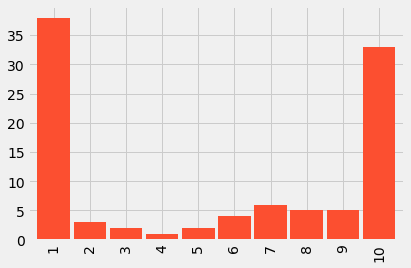

In [0]:
# Create a fake series so we can try and reproduce the example
plt.style.use('fivethirtyeight')
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                index=range(1,11))
fake.plot.bar(color='C1', width=0.9)

In [0]:
# Create another fake series to graph
fake2 = pd.Series(
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  2, 2, 2,
  3, 3, 3,
  4, 4, 
  5, 5, 5, 
  6, 6, 6, 6, 
  7, 7, 7, 7, 7,
  8, 8, 8, 8,
  9, 9, 9, 9,
  10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

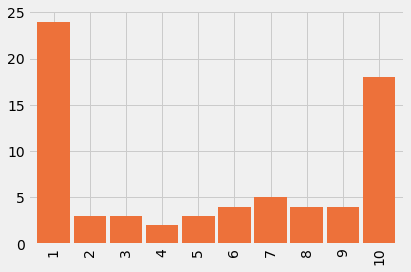

In [0]:
# Create bar graph
fake2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9);

### Annotate with text

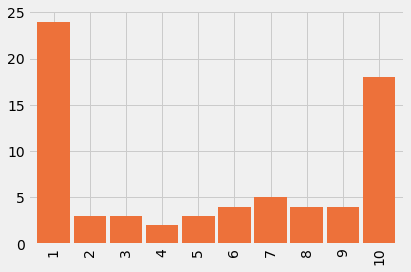

In [0]:
# create fig object
fig = plt.figure()
fake2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9)

Text(0.5, 1.0, 'title')

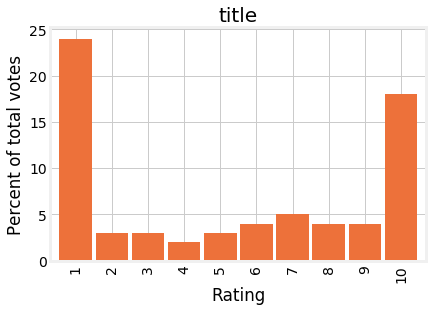

In [0]:
# Make changes/additions to compare to example
fig = plt.figure(facecolor='white')
ax = fake2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9)
ax.set(facecolor='white')
plt.xlabel('Rating')
plt.ylabel('Percent of total votes')
plt.title('title')

In [0]:
# look at example again
display(example)

Text(-0.1, 1.0, "An Inconvenient Sequel: Truth to Power' is divisible")

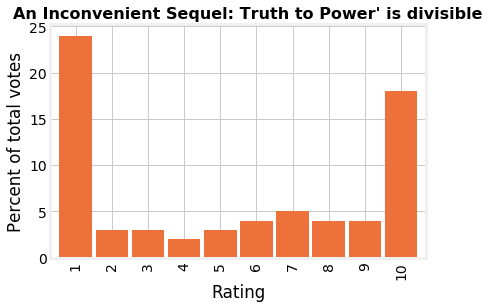

In [0]:
# Improvements
fig = plt.figure(facecolor='white')
ax = fake2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9)
ax.set(facecolor='white')
ax.patch.set_alpha(0.1)
plt.xlabel('Rating')
plt.ylabel('Percent of total votes')
plt.title("An Inconvenient Sequel: Truth to Power' is divisible", 
         fontweight='bold',
         fontsize=16,
         loc='left',
         x=-0.1)

In [0]:
# check what tickes we want on y axis
list(range(0,50,10))

[0, 10, 20, 30, 40]

In [0]:
# list comprehension with an if
[str(i) if i !=40 else str(i) + '%' for i in range(0,50,10)]

['0', '10', '20', '30', '40%']

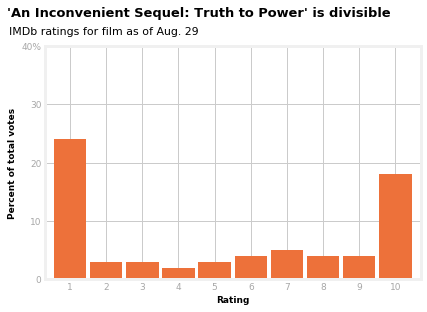

In [0]:
# Change ticks on x and y
fig = plt.figure(facecolor='white')
ax = fake2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9)
ax.set(facecolor='white')
ax.patch.set_alpha(0.1)
plt.xlabel('Rating', fontsize=9, fontweight='bold')
plt.ylabel('Percent of total votes', fontsize=9, fontweight='bold')
plt.title("'An Inconvenient Sequel: Truth to Power' is divisible", 
         fontweight='bold',
         fontsize=13,
         loc='left',
         x=-0.1, y=1.1)
ax.text(x=-1.7, y=42, s='IMDb ratings for film as of Aug. 29', fontsize=11)
plt.xticks(rotation=0, color='#a7a7a7')
plt.yticks(range(0,50,10), 
           labels=[str(i) if i !=40 else str(i) + '%' for i in range(0,50,10)],
           color='#a7a7a7');
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)

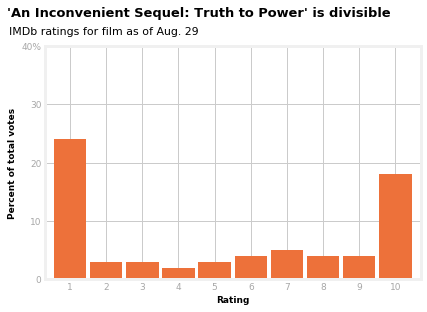

In [0]:
# I think this is very close to the example using fake data
# Change ticks on x and y
fig = plt.figure(facecolor='white')
ax = fake2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9)
ax.set(facecolor='white')
ax.patch.set_alpha(0.1)
plt.xlabel('Rating', fontsize=9, fontweight='bold')
plt.ylabel('Percent of total votes', fontsize=9, fontweight='bold')
plt.title("'An Inconvenient Sequel: Truth to Power' is divisible", 
         fontweight='bold',
         fontsize=13,
         loc='left',
         x=-0.1, y=1.1)
ax.text(x=-1.7, y=42, s='IMDb ratings for film as of Aug. 29', fontsize=11)
plt.xticks(rotation=0, color='#a7a7a7')
plt.yticks(range(0,50,10), 
           labels=[str(i) if i !=40 else str(i) + '%' for i in range(0,50,10)],
           color='#a7a7a7');
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)

In [0]:
display(example)

### Reproduce with real data

In [0]:
# import the dataset and save as pandas dataframe, check the head
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Check types to see if any columns needs changes
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
# timestamp is a str object, let's change to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Check to see timestamp is a datetime object, which it is now
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [0]:
# Summary stats
df.describe()

,respondents,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
count,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000
mean,403.390804,5.331478,5.676954,6.023047,159.455074,11.562103,6.996590,3.211722,7.797684,13.441620,18.832449,17.953256,22.565713,141.574594,37.344919,2.230901,1.726936,1.031519,3.169689,3.504594,4.780199,4.800859,5.978127,35.431905
std,544.977400,1.673279,1.602680,3.131885,227.154951,16.120869,8.964425,4.267118,10.633648,19.326537,26.799409,25.398818,28.591822,187.954673,20.080097,2.444295,1.620233,1.438929,3.903391,4.137329,3.798714,5.224808,5.759520,15.814088
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.300000,4.800000,3.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000,25.000000,0.000000,0.000000,0.000000,0.800000,1.200000,2.200000,2.600000,3.600000,26.300000
50%,244.000000,5.300000,5.500000,6.000000,81.000000,3.000000,4.000000,2.000000,4.000000,6.000000,8.000000,10.000000,16.000000,85.000000,38.600000,2.000000,1.500000,0.600000,1.700000,2.900000,4.200000,4.300000,5.300000,35.500000
75%,518.000000,6.500000,6.600000,9.000000,227.000000,20.000000,10.000000,5.000000,10.000000,19.000000,26.000000,24.000000,32.000000,188.000000,46.000000,3.200000,2.200000,1.400000,3.600000,4.300000,6.800000,5.300000,6.400000,45.100000
max,2662.000000,8.500000,8.600000,10.000000,1021.000000,69.000000,40.000000,25.000000,55.000000,110.000000,154.000000,147.000000,146.000000,897.000000,100.000000,10.300000,9.100000,8.600000,25.000000,50.000000,25.000000,28.600000,33.300000,82.800000


In [0]:
# Check min, max on datetime
print("Min = ", df['timestamp'].min(), "Max = ", df['timestamp'].max())

Min =  2017-07-17 12:28:32.785639 Max =  2017-08-29 23:10:06.218251


In [0]:
# set timestamp as index it to index and either reassign or use inplace command
df = df.set_index('timestamp')

In [0]:
# Check head
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
 # Get data from very last day
  lastday = df['2017-08-29']

In [0]:
lastday.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Filter to IMDb users
lastday_filtered = lastday[lastday['category']=='IMDb users']
lastday_filtered.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


In [0]:
# check tail
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Get counts of users
lastday_filtered['category'].value_counts()

IMDb users    140
Name: category, dtype: int64

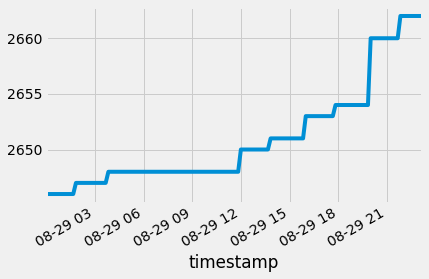

In [0]:
# Plot respondents
lastday_filtered['respondents'].plot()

In [0]:
# We just want .pct of 
pct_columns = [f'{i}_pct' for i in range(1,11)]

In [0]:
pct_columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [0]:
# Get last observation and assign to variable, final
final = lastday_filtered.tail(1)

In [0]:
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# filter by pct_columns
final[pct_columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Transpose it to organize it differently
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
# make subset dataframe named plot_data and change index
plot_data = final[pct_columns].T
plot_data.index = range(1,11)

In [0]:
plot_data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [0]:
# let's look at example graph from which we will try to reproduce but with real data
display(example)

<Figure size 432x288 with 0 Axes>

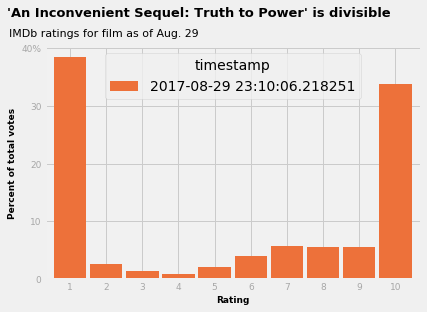

In [0]:
# Replicate with real data from site
plt.style.use('fivethirtyeight')
fig = plt.figure(facecolor='white')
ax = plot_data.plot.bar(color='#ed713a', width=0.9)
ax.set(facecolor='white')
ax.patch.set_alpha(0.1)
plt.xlabel('Rating', fontsize=9, fontweight='bold')
plt.ylabel('Percent of total votes', fontsize=9, fontweight='bold')
plt.title("'An Inconvenient Sequel: Truth to Power' is divisible", 
         fontweight='bold',
         fontsize=13,
         loc='left',
         x=-0.1, y=1.1)
ax.text(x=-1.7, y=42, s='IMDb ratings for film as of Aug. 29', fontsize=11)
plt.xticks(rotation=0, color='#a7a7a7')
plt.yticks(range(0,50,10), 
           labels=[str(i) if i !=40 else str(i) + '%' for i in range(0,50,10)],
           color='#a7a7a7');
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.




In [0]:
# https://fivethirtyeight.com/features/how-americans-like-their-steak/hickey-datalab-steak.png

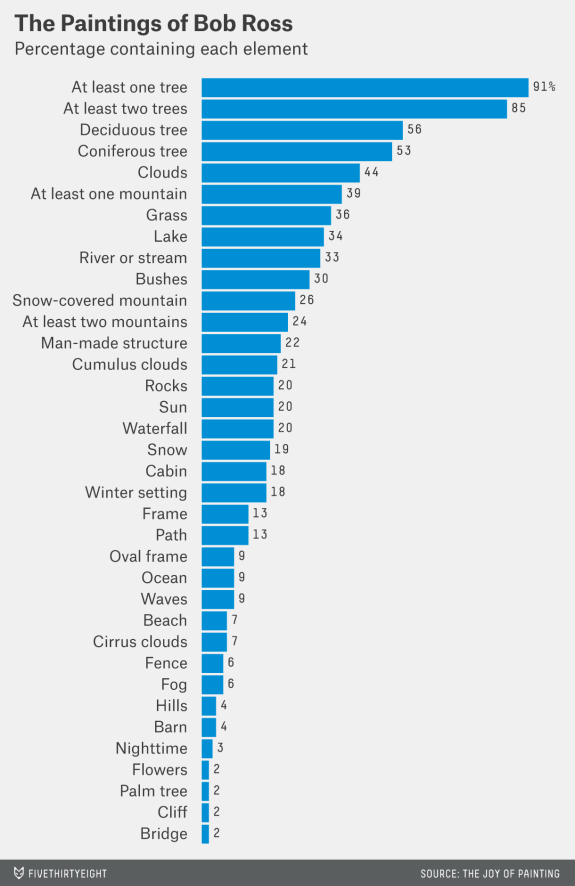

In [2]:
from IPython.display import display, Image
example = Image('hickey.png', width=400)

# The example we are trying to reproduce
display(example)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
plt.style.use('fivethirtyeight')
real = pd.DataFrame([91, 85, 56, 53, 44, 39, 36, 34, 33, 30, 26, 24, 22, 21, 20, 20, 20, 19, 18, 18, 13, 13, 9, 9, 9, 7, 7, 6, 6, 4, 4, 3, 2, 2, 2, 2], index=['At least one tree', 'At least two trees',
'Deciduous tree', 'Coniferous tree', 'Clouds', 'At least one mountain', 'Grass', 'Lake', 'River or stream', 'Bushes', 'Snow-covered mountain', 'At least two mountains', 'Man-made structure', 'Cumulus clouds', 
'Rocks', 'Sun', 'Waterfall', 'Snow', 'Cabin', 'Winter setting', 'Frame', 'Path', 'Oval frame', 'Ocean', 'Waves', 'Beach', 'Cirrus clouds', 'Fence', 'Fog', 'Hills', 'Barn', 'Nighttime', 'Flowers', 'Palm tree', 'Cliff', 'Briddge'], columns=['Percent'])


In [80]:
real.head()

,Percent
At least one tree,91
At least two trees,85
Deciduous tree,56
Coniferous tree,53
Clouds,44


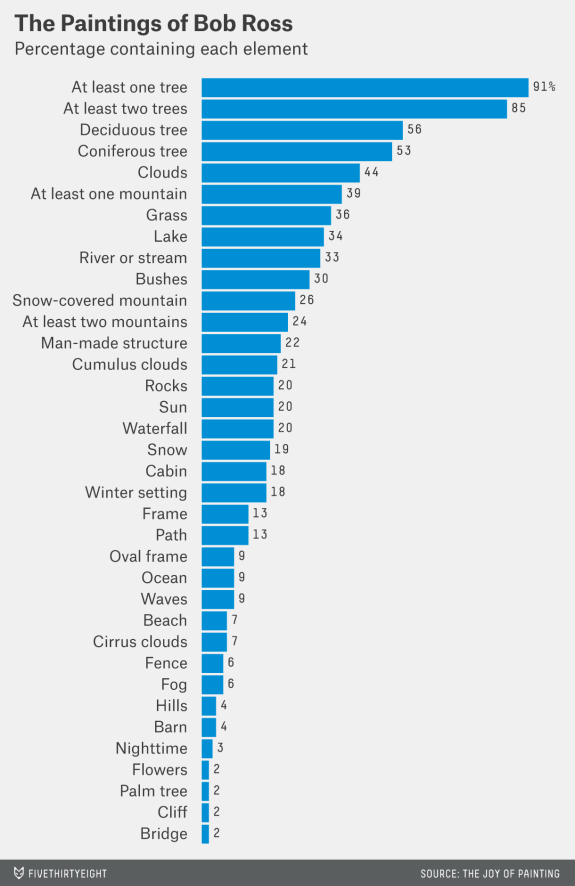

In [13]:
display(example)

In [0]:
real = real.sort_values(by='Percent', ascending=False)

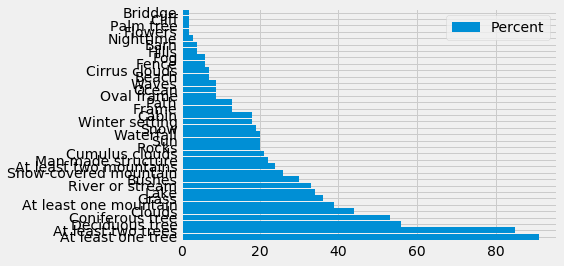

In [85]:
real.plot.barh(width=.91)


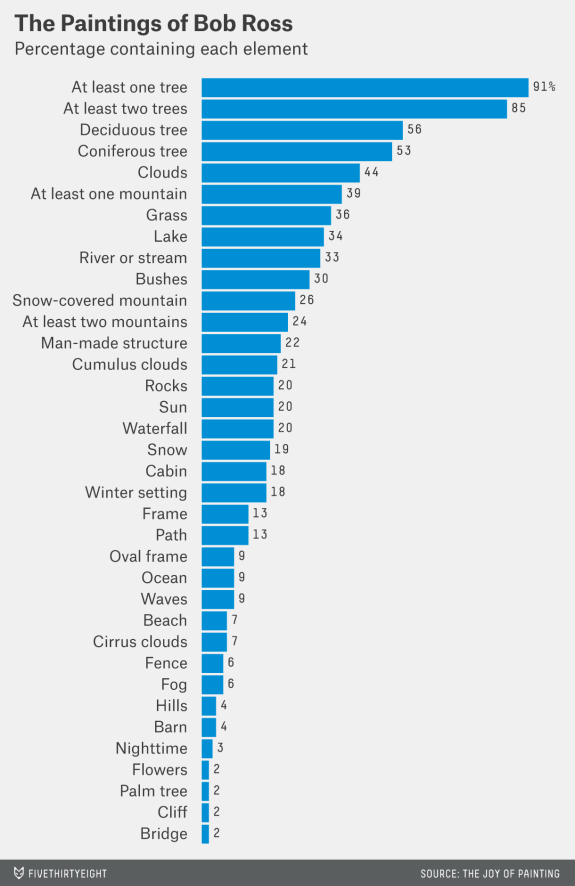

In [34]:
display(example)

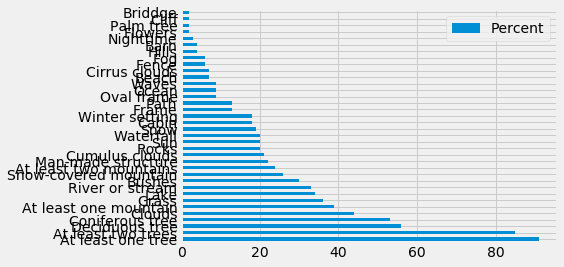

In [78]:
real.plot(kind='barh')

In [0]:
#again

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
import